<a href="https://colab.research.google.com/github/adarshkumaryadav421-prog/test-repo/blob/main/Interpreting_Eigenvalues_and_Eigenvectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Interpreting eigenvalues and eigenvectors

Welcome to the Week 4 Lab. Here you will practice finding and interpreting eigenvalues and eigenvectors for various linear transformations.

**After this lab you will be able to:**
- use Python to find eigenvalues and eigenvectors
- visualize and interpret eigenvalues and eigenvectors

# Table of Contents
- [ 1 - Eigenvalues and Eigenvectors: Definition and Interpretation](#1)
  - [ 1.1 - Definition of Eigenvalues and Eigenvectors](#1.1)
  - [ 1.2 - Finding Eigenvalues and Eigenvectors with Python](#1.2)
- [ 2 - Eigenvalues and Eigenvectors of the Standard Transformations in a Plane](#2)
  - [ 2.1 - Example 1: Reflection about y-axis (the vertical axis)](#2.1)
  - [ 2.2 - Example 2: Shear in x-direction](#2.2)
  - [ 2.3 - Example 4: Identity Matrix and Scaling in All Directions](#2.4)
  - [ 2.4 - Example 5: Projection onto x-axis](#2.5)


## Packages

Run the following cell to load the packages you'll need. The `utils.py` file includes a function you'll use later to plot transformations.

In [4]:
!pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=e60541a4ad6f4fdadf567f23134b16a62cf605ba28b3c6c63c288330ec57f733
  Stored in directory: /root/.cache/pip/wheels/b6/a1/81/1036477786ae0e17b522f6f5a838f9bc4288d1016fc5d0e1ec
Successfully built utils


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import utils

<a name='1'></a>
## 1 - Eigenvalues and Eigenvectors: Definition and Interpretation

<a name='1.1'></a>
### 1.1 - Definition of Eigenvalues and Eigenvectors

Let's consider a linear transformation defined by matrix $A=\begin{bmatrix}2 & 3 \\ 2 & 1 \end{bmatrix}$. Apply this transformation to the standard basis vectors $e_1=\begin{bmatrix}1 \\ 0\end{bmatrix}$ and $e_2=\begin{bmatrix}0 \\ 1\end{bmatrix}$ and visualize the result. Hopefully using a matrix to transform a basis of vectors is familiar from earlier lectures in the course.

In [9]:
A = np.array([[2, 3],[2, 1]])
e1 = np.array([[1],[0]])
e2 = np.array([[0],[1]])

You can use the function `plot_transformation` defined in `utils.py` to visualize the transformation generated by the matrix $A$.

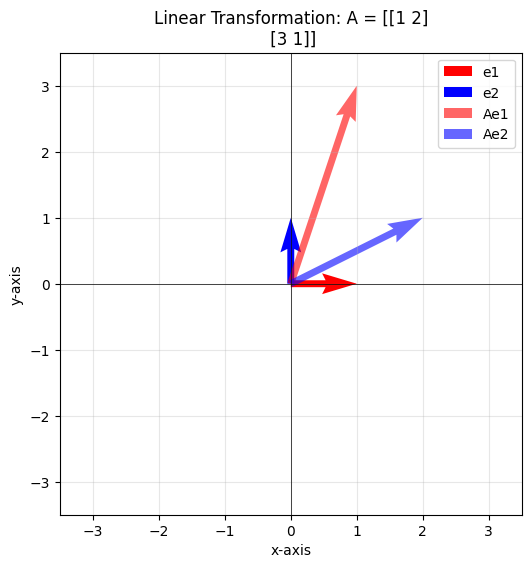

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def plot_transformation(A, e1, e2, vector_name='e'):
    """Plots the effect of a linear transformation A on basis vectors e1 and e2."""
    fig, ax = plt.subplots(figsize=(6, 6))

    # Original vectors
    ax.quiver(0, 0, e1[0], e1[1], angles='xy', scale_units='xy', scale=1,
              color='r', width=0.015, label=f'{vector_name}1')
    ax.quiver(0, 0, e2[0], e2[1], angles='xy', scale_units='xy', scale=1,
              color='b', width=0.015, label=f'{vector_name}2')

    # Transformed vectors
    Ae1 = A @ e1
    Ae2 = A @ e2

    # Use solid lines for transformed vectors instead of dashed
    ax.quiver(0, 0, Ae1[0], Ae1[1], angles='xy', scale_units='xy', scale=1,
              color='r', width=0.015, alpha=0.6, label=f'A{vector_name}1')
    ax.quiver(0, 0, Ae2[0], Ae2[1], angles='xy', scale_units='xy', scale=1,
              color='b', width=0.015, alpha=0.6, label=f'A{vector_name}2')

    # Set limits with some padding
    all_vectors = np.vstack([e1, e2, Ae1, Ae2])
    max_val = np.max(np.abs(all_vectors)) + 0.5
    ax.set_xlim(-max_val, max_val)
    ax.set_ylim(-max_val, max_val)

    # Add grid and axes
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_aspect('equal')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Add titles and labels
    ax.set_title(f'Linear Transformation: A = {A}')
    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')

    plt.show()

# Example usage:
A = np.array([[1, 2],
              [3, 1]])
e1 = np.array([1, 0])
e2 = np.array([0, 1])
plot_transformation(A, e1, e2, vector_name='e')

Both of the original basis vectors $e_1$ and $e_2$ changed their length and direction with the transformation $A$. What if you could choose some other basis vectors where only their lengths will change? This means that for the vector $v$, its transformation will be $Av=\lambda v$.

As you saw in the lectures, a vector $v$ with this property is called an **eigenvector** and the scaling factor $\lambda$ is called an **eigenvalue**.

Note that if $v$ is an eigenvector, so that $Av = \lambda v$, then any multiple or scaled version of $v$ is also an eigenvector with the same eigenvalue. If we let $k$ represent that scale factor, we would write this mathematically as:

$$A(kv)=k(Av)=k \lambda v = \lambda (kv),$$
where $k$ is any real valued constant different from zero.

In other words, for each eigenvalue, there are infinitely many valid eigenvectors. You can imagine them as all pointing along the same straight line and just having different lengths, or norms. In practice, you will choose just one eigenvector, and it is common to choose the eigenvector which has a norm of 1.

<a name='1.2'></a>
### 1.2 - Finding Eigenvalues and Eigenvectors with Python

In Python eigenvalues and eigenvectors can be found using the `NumPy` function `np.linalg.eig()`. It returns a tuple consisting of a vector and an array. The vector contains the eigenvalues. The array contains the corresponding eigenvectors, one eigenvector per column. Note that this function chooses the eigenvectors so that they have a norm of 1.

With the following code you can find an eigenvalues and eigenvectors for the previously defined matrix $A$:

In [23]:
A_eig = np.linalg.eig(A)

print("\n")

print(f"Matrix A:\n{A} \n\nEigenvalues of matrix A:\n{A_eig[0]}\n\nEigenvectors of matrix A:\n{A_eig[1]}")



Matrix A:
[[1 2]
 [3 1]] 

Eigenvalues of matrix A:
[ 3.44948974 -1.44948974]

Eigenvectors of matrix A:
[[ 0.63245553 -0.63245553]
 [ 0.77459667  0.77459667]]


Remember that the first element of the tuple contains the eigenvalues, and the second one has the eigenvectors, one in each column. This means that the first eigenvector can be extracted with the code `A_eig[1][:,0]` and second eigenvector with the code `A_eig[1][:,1]`.

Let's visualize the result of the transformation on the eigenvectors:

In [27]:
%%writefile utils.py
import numpy as np
import matplotlib.pyplot as plt

def plot_transformation(matrix, *vectors, vector_name=None):
    """
    Plots a linear transformation and the transformed vectors.

    Args:
        matrix: The 2x2 transformation matrix.
        *vectors: The vectors to be transformed.
        vector_name: The name to use for the vectors in the plot legend.
    """
    plt.figure(figsize=(8, 8))
    ax = plt.gca()

    # Plot original vectors
    for i, vec in enumerate(vectors):
        origin = np.array([[0, 0], [0, 0]]) # origin point for the vectors
        plt.quiver(*origin, vec[0, :], vec[1, :], color=['r', 'b', 'g', 'purple'][i], scale=1, angles='xy', scale_units='xy', label=f'{vector_name}_{i+1}' if vector_name else f'vector_{i+1}')

    # Apply transformation
    transformed_vectors = [matrix @ vec for vec in vectors]

    # Plot transformed vectors
    for i, vec in enumerate(transformed_vectors):
        origin = np.array([[0, 0], [0, 0]]) # origin point for the vectors
        plt.quiver(*origin, vec[0, :], vec[1, :], color=['darkred', 'darkblue', 'darkgreen', 'indigo'][i], scale=1, angles='xy', scale_units='xy', label=f'transformed_{vector_name}_{i+1}' if vector_name else f'transformed_vector_{i+1}')


    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim([-5, 5])
    ax.set_ylim([-5, 5])
    ax.set_aspect('equal', adjustable='box')
    ax.grid(True)
    ax.legend()
    plt.title('Linear Transformation')
    plt.show()

Overwriting utils.py


In [28]:
import utils
import importlib
importlib.reload(utils)

<module 'utils' from '/content/utils.py'>

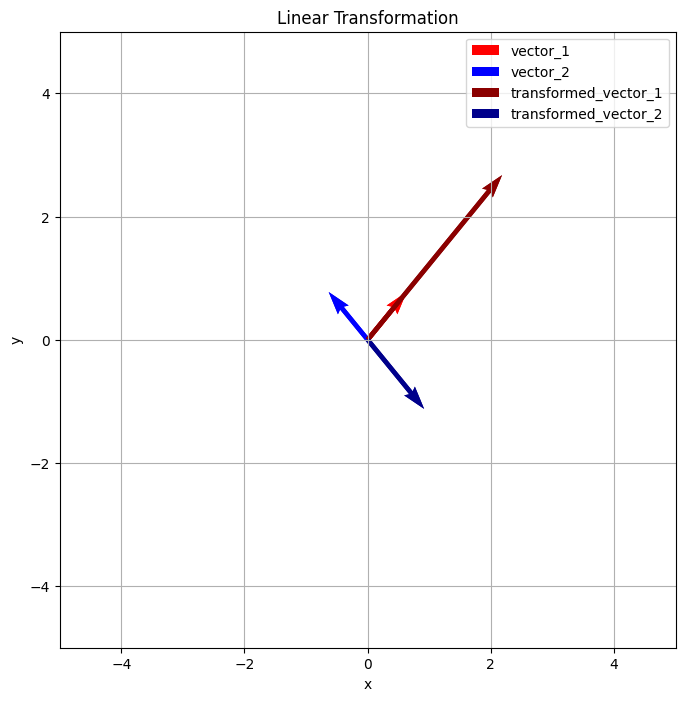

In [ ]:
utils.plot_transformation(A, A_eig[1][:,0][:, np.newaxis], A_eig[1][:,1][:, np.newaxis]);

As you can see, $v_1$ is being streched by a factor of 4, while $v_2$ shows a change of the direction, which is equivalent to a factor of -1. Both vectors, however, are still parallel to the direction they were originally pointing and so meet the definition of an eigenvector.

<a name='2'></a>
## 2 - Eigenvalues and Eigenvectors of some Standard Transformations in a Plane


<a name='2.1'></a>
### 2.1 - Example 1: Reflection about y-axis (the vertical axis)

If you want to create a reflection about the y-axis, you need to keep the value of the y-axis fixed, while changing the direction of the vector around the x-axis.
This can be done with the matrix
$$A_{\text{reflection_yaxis}}= \left[\begin{matrix}-1& 0\\0 &1\end{matrix}\right]. $$

<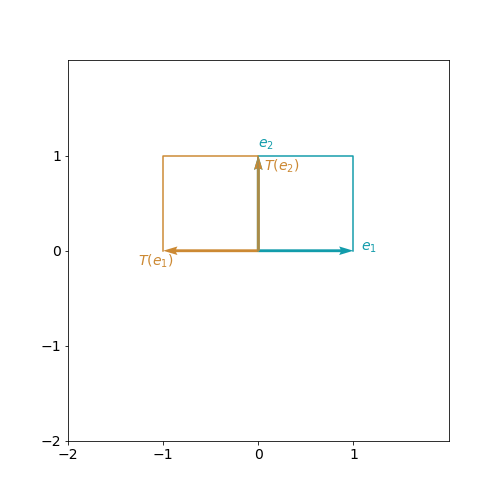img src = "./images/reflection.png" align="center"/>

In the following code, you will define the matrix, find its eigenvalues and eigenvectors, and visualize the result How would you interpret this linear transformation in terms of the eigenvectors and their eigenvalues?

Matrix A:
 [[-1  0]
 [ 0  1]] 

Eigenvalues of matrix A:
 [-1.  1.] 

Eigenvectors of matrix A:
 [[1. 0.]
 [0. 1.]]


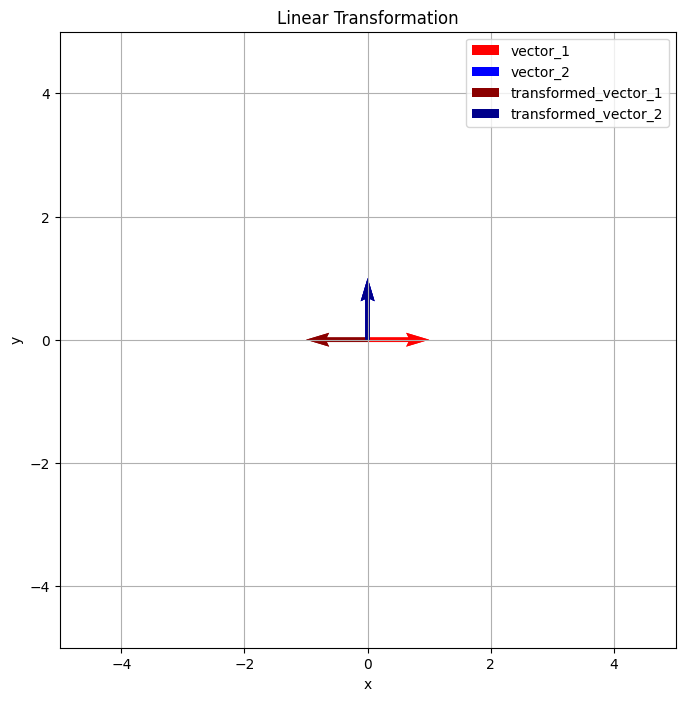

In [34]:
# Define transformation matrix A_reflection_yaxis as a numpy array.
A_reflection_yaxis = np.array([[-1,0],[0,1]])

# Find eigenvalues and eigenvectors of matrix A_reflection_yaxis.
A_reflection_yaxis_eig = np.linalg.eig(A_reflection_yaxis)

print(f"Matrix A:\n {A_reflection_yaxis} \n\nEigenvalues of matrix A:\n {A_reflection_yaxis_eig[0]}",
        f"\n\nEigenvectors of matrix A:\n {A_reflection_yaxis_eig[1]}")

# Convert 1D eigenvectors to 2D column vectors for the plotting function
eigenvector1 = A_reflection_yaxis_eig[1][:, 0].reshape(-1, 1)
eigenvector2 = A_reflection_yaxis_eig[1][:, 1].reshape(-1, 1)

utils.plot_transformation(A_reflection_yaxis, eigenvector1, eigenvector2)

In the examples you've seen so far, you've considered 2 $\times$ 2 matrices, and each of them have had 2 distinct eigenvalues, and 2 distinct eigenvectors. A natural question arises: is it always possible to find two different eigenvectors for any linear transformation in the plane? As you already learned in the lectures, the answer is unfortunately no. You'll see a case of this happening in the following example.

<a name='2.2'></a>
### 2.2 - Example 2: Shear in x-direction

A **shear transformation** looks like the image below. This transformation displaces each point in a fixed direction by an amount proportional to its signed distance from a given line parallel to that direction. You can imagine it as slicing the plane into layers and then sliding those layers past one another. Let's explore how many eigenvectors this kind of transformation has.


<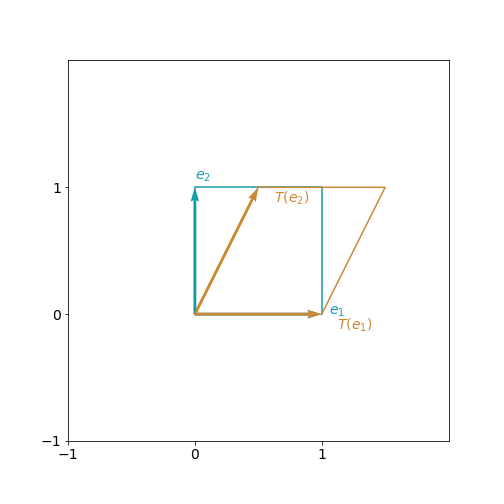


To create a matrix transformation that shears in the x-direction, you want to displace the component in the y-direction by some factor, say 0.5. This can be done with the following matrix:

$$A_{\text{shear_x}}= \left[\begin{matrix}1& 0.5\\0 &1\end{matrix}\right]. $$


Note that vector $e_1=\begin{bmatrix}1 \\ 0\end{bmatrix}$ will remain the same, and vector $e_2=\begin{bmatrix}0 \\ 1\end{bmatrix}$ will transform into a vector $\begin{bmatrix}0.5 \\ 1\end{bmatrix}$.

In the next cell, you will define the shear matrix, find the eigenvalues and eigenvectors, and visualize the transformation applied to the eigenvectors you find.


Matrix A_shear_x:
 [[1.  0.5]
 [0.  1. ]]

Eigenvalues of matrix A_shear_x:
 [1. 1.] 

Eigenvectors of matrix A_shear_x 
 [[ 1.0000000e+00 -1.0000000e+00]
 [ 0.0000000e+00  4.4408921e-16]]


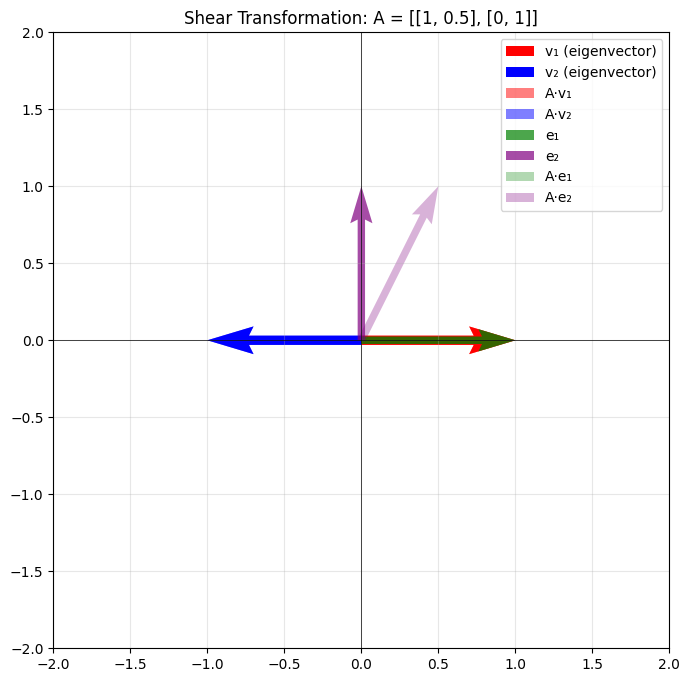

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Define transformation matrix A_shear_x as a numpy array.
A_shear_x = np.array([[1, 0.5],[0, 1]])

# Find eigenvalues and eigenvectors of matrix A_shear_x.
A_shear_x_eig = np.linalg.eig(A_shear_x)

print(f"Matrix A_shear_x:\n {A_shear_x}\n\nEigenvalues of matrix A_shear_x:\n {A_shear_x_eig[0]}",
      f"\n\nEigenvectors of matrix A_shear_x \n {A_shear_x_eig[1]}")

def plot_shear_transformation(A, eigenvectors):
    """Plot the shear transformation showing eigenvectors"""
    fig, ax = plt.subplots(figsize=(8, 8))

    v1 = eigenvectors[:, 0]
    v2 = eigenvectors[:, 1]

    # Plot original eigenvectors
    ax.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1,
              color='red', width=0.015, label='v₁ (eigenvector)')
    ax.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1,
              color='blue', width=0.015, label='v₂ (eigenvector)')

    # Plot transformed eigenvectors (use solid lines with different alpha instead of dashed)
    Av1 = A @ v1
    Av2 = A @ v2

    ax.quiver(0, 0, Av1[0], Av1[1], angles='xy', scale_units='xy', scale=1,
              color='red', width=0.015, alpha=0.5, label='A·v₁')
    ax.quiver(0, 0, Av2[0], Av2[1], angles='xy', scale_units='xy', scale=1,
              color='blue', width=0.015, alpha=0.5, label='A·v₂')

    # Also plot the standard basis vectors to show the shear effect
    e1 = np.array([1, 0])
    e2 = np.array([0, 1])
    Ae1 = A @ e1
    Ae2 = A @ e2

    ax.quiver(0, 0, e1[0], e1[1], angles='xy', scale_units='xy', scale=1,
              color='green', width=0.012, alpha=0.7, label='e₁')
    ax.quiver(0, 0, e2[0], e2[1], angles='xy', scale_units='xy', scale=1,
              color='purple', width=0.012, alpha=0.7, label='e₂')
    ax.quiver(0, 0, Ae1[0], Ae1[1], angles='xy', scale_units='xy', scale=1,
              color='green', width=0.012, alpha=0.3, label='A·e₁')
    ax.quiver(0, 0, Ae2[0], Ae2[1], angles='xy', scale_units='xy', scale=1,
              color='purple', width=0.012, alpha=0.3, label='A·e₂')

    # Set limits
    max_val = 2
    ax.set_xlim(-max_val, max_val)
    ax.set_ylim(-max_val, max_val)

    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_aspect('equal')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_title('Shear Transformation: A = [[1, 0.5], [0, 1]]')
    plt.show()

# Usage:
plot_shear_transformation(A_shear_x, A_shear_x_eig[1])

In [36]:
A_rotation = np.array([[0, 1],[-1, 0]])
A_rotation_eig = np.linalg.eig(A_rotation)




print(f"Matrix A_rotation:\n {A_rotation}\n\nEigenvalues of matrix A_rotation:\n {A_rotation_eig[0]}",
      f"\n\nEigenvectors of matrix A_rotation \n {A_rotation_eig[1]}")


Matrix A_rotation:
 [[ 0  1]
 [-1  0]]

Eigenvalues of matrix A_rotation:
 [0.+1.j 0.-1.j] 

Eigenvectors of matrix A_rotation 
 [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        +0.70710678j 0.        -0.70710678j]]


As you can see, there are two eigenvalues in the output, but they are actually complex numbers. Note in Python the imaginary part of the complex numbers is indicated with a `j` instead of the $i$ you see more commonly in mathematics.

This matrix has two complex eigenvalues and two corresponding complex eigenvectors. Since there are no real eigenvectors, however, we can interpret this result as saying there are no vectors on the plane that will keep their direction after a 90 degree rotation. And think about it, that makes sense. If you rotate the plane, every vector will now be facing in a new direction.

If you're less familiar with real vs. complex numbers don't worry. The main point here is that some 2 $\times$ 2 matrices will only have one or zero real eigenvectors, and hopefully you're developing intuition for why that's the case. If there are no vectors that point in the same direction after the matrix transformation is applied, we wouldn't expect to find any eigenvectors. With that in mind, let's look at another interesting example.

<a name='2.3'></a>
### 2.3 - Example 3: Identity Matrix and Scaling in All Directions

What happens if we transform the plane using the identity matrix? This means that there will be no change to any vector in the plane. Since every point and vector does not move at all, in this case every vector is still facing in the same direction, and every vectors meets the definition of an eigenvector.

In the next cell, you will explore what kinds of output you get from `NumPy` when you try to calculate the eigenvalues and eigenvectors of the identity matrix.

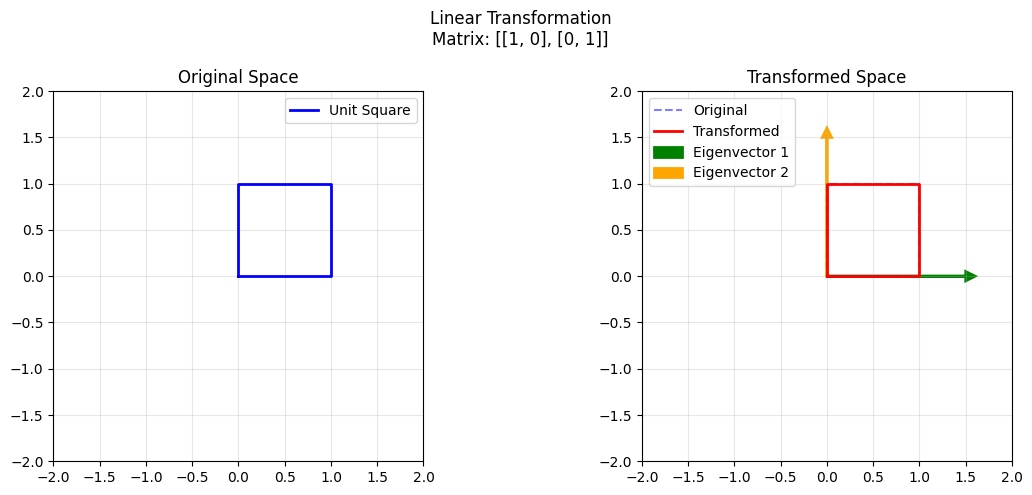

Matrix A_identity:
[[1 0]
 [0 1]]

Eigenvalues of matrix A_identity:
[1. 1.]

Eigenvectors of matrix A_identity:
[[1. 0.]
 [0. 1.]]

ANALYSIS:
Eigenvalue 1: 1.0
Eigenvector 1: [1. 0.]
Eigenvalue 2: 1.0
Eigenvector 2: [0. 1.]

Key Properties of Identity Matrix:
• All eigenvalues = 1 (no scaling)
• Eigenvectors are standard basis vectors
• Every vector is technically an eigenvector
• Represents the 'do nothing' transformation

Verification (A * v₁ = λ₁ * v₁):
A * v₁ = [1. 0.]
λ₁ * v₁ = [1. 0.]
Equal? True


In [40]:
import numpy as np
import matplotlib.pyplot as plt

def plot_transformation(A, eigvec1, eigvec2, title="Linear Transformation"):
    """
    Plot the effect of a linear transformation matrix A on a unit square,
    along with its eigenvectors.
    """
    # Create a figure with subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Original unit square vertices
    unit_square = np.array([[0, 1, 1, 0, 0],
                           [0, 0, 1, 1, 0]])

    # Transform the unit square
    transformed_square = A @ unit_square

    # Plot original space
    ax1.plot(unit_square[0], unit_square[1], 'b-', linewidth=2, label='Unit Square')
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(-2, 2)
    ax1.set_ylim(-2, 2)
    ax1.set_aspect('equal')
    ax1.set_title('Original Space')
    ax1.legend()

    # Plot transformed space
    ax2.plot(unit_square[0], unit_square[1], 'b--', alpha=0.5, label='Original')
    ax2.plot(transformed_square[0], transformed_square[1], 'r-', linewidth=2, label='Transformed')

    # Plot eigenvectors
    scale = 1.5
    ax2.arrow(0, 0, eigvec1[0]*scale, eigvec1[1]*scale,
              head_width=0.1, head_length=0.1, fc='green', ec='green',
              linewidth=2, label='Eigenvector 1')
    ax2.arrow(0, 0, eigvec2[0]*scale, eigvec2[1]*scale,
              head_width=0.1, head_length=0.1, fc='orange', ec='orange',
              linewidth=2, label='Eigenvector 2')

    ax2.grid(True, alpha=0.3)
    ax2.set_xlim(-2, 2)
    ax2.set_ylim(-2, 2)
    ax2.set_aspect('equal')
    ax2.set_title('Transformed Space')
    ax2.legend()

    plt.suptitle(f'{title}\nMatrix: {A.tolist()}')
    plt.tight_layout()
    plt.show()

# Create identity matrix
A_identity = np.array([[1, 0],
                       [0, 1]])

# Calculate eigenvalues and eigenvectors
A_identity_eig = np.linalg.eig(A_identity)

# Plot the transformation
plot_transformation(A_identity, A_identity_eig[1][:,0], A_identity_eig[1][:,1])

# Print results
print(f"Matrix A_identity:\n{A_identity}")
print(f"\nEigenvalues of matrix A_identity:\n{A_identity_eig[0]}")
print(f"\nEigenvectors of matrix A_identity:\n{A_identity_eig[1]}")

# Additional analysis
print("\n" + "="*50)
print("ANALYSIS:")
print("="*50)
print(f"Eigenvalue 1: {A_identity_eig[0][0]}")
print(f"Eigenvector 1: {A_identity_eig[1][:,0]}")
print(f"Eigenvalue 2: {A_identity_eig[0][1]}")
print(f"Eigenvector 2: {A_identity_eig[1][:,1]}")

print("\nKey Properties of Identity Matrix:")
print("• All eigenvalues = 1 (no scaling)")
print("• Eigenvectors are standard basis vectors")
print("• Every vector is technically an eigenvector")
print("• Represents the 'do nothing' transformation")

# Verify eigenvector property: A * v = λ * v
print(f"\nVerification (A * v₁ = λ₁ * v₁):")
v1 = A_identity_eig[1][:,0]
lambda1 = A_identity_eig[0][0]
left_side = A_identity @ v1
right_side = lambda1 * v1
print(f"A * v₁ = {left_side}")
print(f"λ₁ * v₁ = {right_side}")
print(f"Equal? {np.allclose(left_side, right_side)}")

As you can see, the out of the `np.linalg.eig()` function shows that there are two eigenvalues that are equal to each other $\lambda = 1$, which is true. But the list of eigenvectors does not cover all of them. It can be shown algebraically that all of the vectors will be eigenvectors for identity matrix. Using software, you can't see it sometimes, so be careful! That's why understanding the mathematical objects behind your code and models is so important.

Check that the same will happen finding eigenvectors for the scaling (dilation) in both directions x and y by factor of $2$. In this case every vector is facing the same direction as it was before, but twice as long. Once again, every vector meets the definition of an eigenvector, but `NumPy` will only provide two.

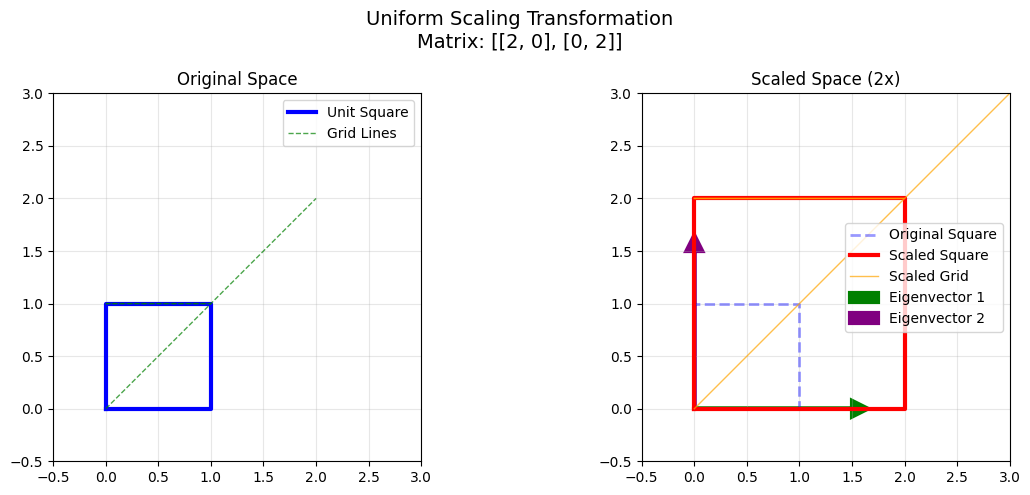

Matrix A_scaling:
[[2 0]
 [0 2]]

Eigenvalues of matrix A_scaling:
[2. 2.]

Eigenvectors of matrix A_scaling:
[[1. 0.]
 [0. 1.]]

ANALYSIS: UNIFORM SCALING MATRIX
Eigenvalue 1: 2.0 (scaling factor)
Eigenvector 1: [1. 0.] (x-direction)
Eigenvalue 2: 2.0 (scaling factor)
Eigenvector 2: [0. 1.] (y-direction)

Scaling Factor: 2.0x in all directions
Area scaling: 4.0x

Key Properties of Uniform Scaling Matrix:
• All eigenvalues are equal (uniform scaling)
• Eigenvectors are standard basis vectors
• Every vector direction is preserved
• All shapes maintain their proportions
• Determinant = product of eigenvalues = area scaling factor

Verification (A * v₁ = λ₁ * v₁):
A * v₁ = [2. 0.]
λ₁ * v₁ = [2. 0.]
Equal? True

Example: Scaling vector [1, 1]:
Original: [1 1]
Scaled:   [2 2]
Length ratio: 2.0

Comparison with Identity Matrix:
Identity eigenvalues: [1. 1.]
Scaling eigenvalues:  [2. 2.]
Difference: Each eigenvalue multiplied by 2


In [41]:
import numpy as np
import matplotlib.pyplot as plt

def plot_transformation(A, eigvec1, eigvec2, title="Linear Transformation"):
    """
    Plot the effect of a linear transformation matrix A on a unit square,
    along with its eigenvectors.
    """
    # Create a figure with subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Original unit square vertices
    unit_square = np.array([[0, 1, 1, 0, 0],
                           [0, 0, 1, 1, 0]])

    # Grid lines for reference
    x_lines = np.array([[0, 1], [0, 1], [1, 1], [2, 2]]).T
    y_lines = np.array([[0, 0], [1, 1], [0, 1], [0, 1]]).T

    # Transform the unit square and grid
    transformed_square = A @ unit_square
    transformed_x_lines = A @ x_lines
    transformed_y_lines = A @ y_lines

    # Plot original space
    ax1.plot(unit_square[0], unit_square[1], 'b-', linewidth=3, label='Unit Square')
    ax1.plot(x_lines[0], x_lines[1], 'g--', alpha=0.7, linewidth=1, label='Grid Lines')
    ax1.plot(y_lines[0], y_lines[1], 'g--', alpha=0.7, linewidth=1)
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(-0.5, 3)
    ax1.set_ylim(-0.5, 3)
    ax1.set_aspect('equal')
    ax1.set_title('Original Space')
    ax1.legend()

    # Plot transformed space
    ax2.plot(unit_square[0], unit_square[1], 'b--', alpha=0.4, linewidth=2, label='Original Square')
    ax2.plot(transformed_square[0], transformed_square[1], 'r-', linewidth=3, label='Scaled Square')
    ax2.plot(transformed_x_lines[0], transformed_x_lines[1], 'orange', alpha=0.7, linewidth=1, label='Scaled Grid')
    ax2.plot(transformed_y_lines[0], transformed_y_lines[1], 'orange', alpha=0.7, linewidth=1)

    # Plot eigenvectors
    scale = 1.5
    ax2.arrow(0, 0, eigvec1[0]*scale, eigvec1[1]*scale,
              head_width=0.15, head_length=0.15, fc='green', ec='green',
              linewidth=3, label='Eigenvector 1')
    ax2.arrow(0, 0, eigvec2[0]*scale, eigvec2[1]*scale,
              head_width=0.15, head_length=0.15, fc='purple', ec='purple',
              linewidth=3, label='Eigenvector 2')

    ax2.grid(True, alpha=0.3)
    ax2.set_xlim(-0.5, 3)
    ax2.set_ylim(-0.5, 3)
    ax2.set_aspect('equal')
    ax2.set_title('Scaled Space (2x)')
    ax2.legend()

    plt.suptitle(f'{title}\nMatrix: {A.tolist()}', fontsize=14)
    plt.tight_layout()
    plt.show()

# Create scaling matrix (2x uniform scaling)
A_scaling = np.array([[2, 0],
                      [0, 2]])

# Calculate eigenvalues and eigenvectors
A_scaling_eig = np.linalg.eig(A_scaling)

# Plot the transformation
plot_transformation(A_scaling, A_scaling_eig[1][:,0], A_scaling_eig[1][:,1],
                   "Uniform Scaling Transformation")

# Print results
print(f"Matrix A_scaling:\n{A_scaling}")
print(f"\nEigenvalues of matrix A_scaling:\n{A_scaling_eig[0]}")
print(f"\nEigenvectors of matrix A_scaling:\n{A_scaling_eig[1]}")

# Additional analysis
print("\n" + "="*60)
print("ANALYSIS: UNIFORM SCALING MATRIX")
print("="*60)
print(f"Eigenvalue 1: {A_scaling_eig[0][0]} (scaling factor)")
print(f"Eigenvector 1: {A_scaling_eig[1][:,0]} (x-direction)")
print(f"Eigenvalue 2: {A_scaling_eig[0][1]} (scaling factor)")
print(f"Eigenvector 2: {A_scaling_eig[1][:,1]} (y-direction)")

print(f"\nScaling Factor: {A_scaling_eig[0][0]}x in all directions")
print(f"Area scaling: {A_scaling_eig[0][0] * A_scaling_eig[0][1]}x")

print("\nKey Properties of Uniform Scaling Matrix:")
print("• All eigenvalues are equal (uniform scaling)")
print("• Eigenvectors are standard basis vectors")
print("• Every vector direction is preserved")
print("• All shapes maintain their proportions")
print("• Determinant = product of eigenvalues = area scaling factor")

# Verify eigenvector property: A * v = λ * v
print(f"\nVerification (A * v₁ = λ₁ * v₁):")
v1 = A_scaling_eig[1][:,0]
lambda1 = A_scaling_eig[0][0]
left_side = A_scaling @ v1
right_side = lambda1 * v1
print(f"A * v₁ = {left_side}")
print(f"λ₁ * v₁ = {right_side}")
print(f"Equal? {np.allclose(left_side, right_side)}")

# Demonstrate scaling effect on a sample vector
print(f"\nExample: Scaling vector [1, 1]:")
test_vector = np.array([1, 1])
scaled_vector = A_scaling @ test_vector
print(f"Original: {test_vector}")
print(f"Scaled:   {scaled_vector}")
print(f"Length ratio: {np.linalg.norm(scaled_vector) / np.linalg.norm(test_vector):.1f}")

# Compare with identity matrix
print(f"\nComparison with Identity Matrix:")
A_identity = np.array([[1, 0], [0, 1]])
print(f"Identity eigenvalues: {np.linalg.eig(A_identity)[0]}")
print(f"Scaling eigenvalues:  {A_scaling_eig[0]}")
print(f"Difference: Each eigenvalue multiplied by {A_scaling[0,0]}")

<a name='2.4'></a>
### 2.4 - Example 4: Projection onto x-axis

Let's investigate one last interesting example: projection onto the x-axis. This transformation keeps only the x component of the vector and sets all y-values to 0.

The transformation that projects onto the x-axis can be defined by the matrix
$$A_{\text{projection}}=\begin{bmatrix}1 & 0 \\ 0 & 0 \end{bmatrix}.$$

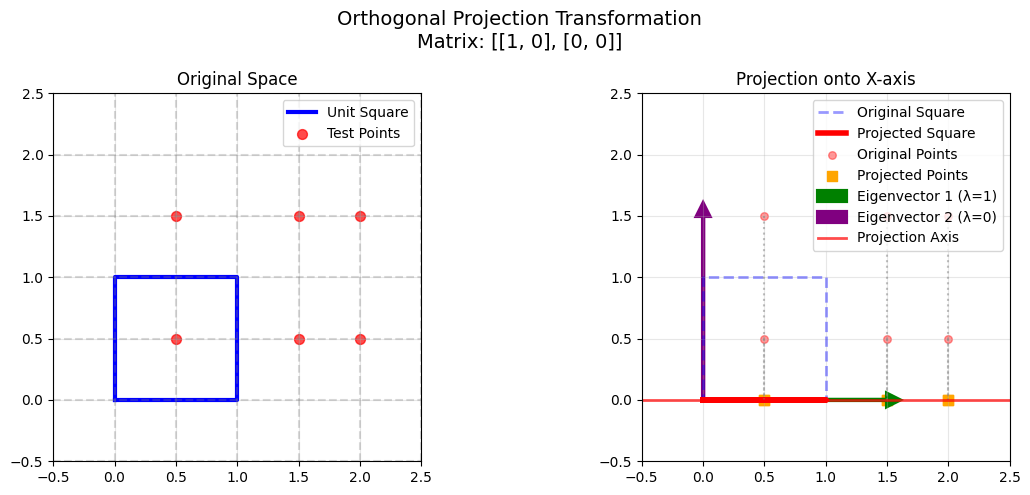

Matrix A_projection:
[[1 0]
 [0 0]]

Eigenvalues of matrix A_projection:
[1. 0.]

Eigenvectors of matrix A_projection:
[[1. 0.]
 [0. 1.]]

ANALYSIS: ORTHOGONAL PROJECTION MATRIX
Eigenvalue 1: 1.0 (preserved direction)
Eigenvector 1: [1. 0.] (x-direction - preserved)
Eigenvalue 2: 0.0 (collapsed direction)
Eigenvector 2: [0. 1.] (y-direction - collapsed)

Key Properties of Projection Matrix:
• Projects all points onto the x-axis
• One eigenvalue = 1 (direction is preserved)
• One eigenvalue = 0 (direction is collapsed)
• Information in y-direction is completely lost
• Transformation is NOT invertible (determinant = 0)
• Matrix is idempotent: A² = A

Verification of Eigenvalue Equation (A * v = λ * v):
For eigenvector 1:
  A * v₁ = [1. 0.]
  λ₁ * v₁ = [1. 0.]
  Equal? True
For eigenvector 2:
  A * v₂ = [0. 0.]
  λ₂ * v₂ = [0. 0.]
  Equal? True

Projection Examples:
  [1, 0] → [1, 0]
  [0, 1] → [0, 0]
  [1, 1] → [1, 0]
  [2, 3] → [2, 0]

Idempotent Property (A² = A):
A = 
[[1 0]
 [0 0]]
A

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def plot_transformation(A, eigvec1, eigvec2, title="Linear Transformation"):
    """
    Plot the effect of a linear transformation matrix A on a unit square,
    along with its eigenvectors.
    """
    # Create a figure with subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Original unit square vertices
    unit_square = np.array([[0, 1, 1, 0, 0],
                           [0, 0, 1, 1, 0]])

    # Additional points to show the projection effect
    test_points = np.array([[0.5, 0.5, 1.5, 1.5, 2, 2],
                           [0.5, 1.5, 0.5, 1.5, 0.5, 1.5]])

    # Transform the unit square and test points
    transformed_square = A @ unit_square
    transformed_points = A @ test_points

    # Plot original space
    ax1.plot(unit_square[0], unit_square[1], 'b-', linewidth=3, label='Unit Square')
    ax1.scatter(test_points[0], test_points[1], c='red', s=50, alpha=0.7, label='Test Points')

    # Add grid lines for reference
    for x in np.linspace(-0.5, 2.5, 7):
        ax1.axvline(x, color='gray', alpha=0.3, linestyle='--')
    for y in np.linspace(-0.5, 2.5, 7):
        ax1.axhline(y, color='gray', alpha=0.3, linestyle='--')

    ax1.set_xlim(-0.5, 2.5)
    ax1.set_ylim(-0.5, 2.5)
    ax1.set_aspect('equal')
    ax1.set_title('Original Space')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot transformed space (projection)
    ax2.plot(unit_square[0], unit_square[1], 'b--', alpha=0.4, linewidth=2, label='Original Square')
    ax2.plot(transformed_square[0], transformed_square[1], 'r-', linewidth=4, label='Projected Square')
    ax2.scatter(test_points[0], test_points[1], c='red', s=30, alpha=0.4, label='Original Points')
    ax2.scatter(transformed_points[0], transformed_points[1], c='orange', s=60, marker='s', label='Projected Points')

    # Draw projection lines to show where points go
    for i in range(len(test_points[0])):
        ax2.plot([test_points[0,i], transformed_points[0,i]],
                [test_points[1,i], transformed_points[1,i]],
                'gray', alpha=0.5, linestyle=':')

    # Plot eigenvectors
    scale = 1.5
    if eigvec1[1] == 0:  # First eigenvector is horizontal
        ax2.arrow(0, 0, eigvec1[0]*scale, eigvec1[1]*scale,
                  head_width=0.1, head_length=0.1, fc='green', ec='green',
                  linewidth=3, label=f'Eigenvector 1 (λ={A[0,0]})')
    else:
        ax2.arrow(0, 0, eigvec1[0]*scale, eigvec1[1]*scale,
                  head_width=0.1, head_length=0.1, fc='green', ec='green',
                  linewidth=3, label=f'Eigenvector 1 (λ={A[0,0]})')

    if eigvec2[0] == 0:  # Second eigenvector is vertical
        ax2.arrow(0, 0, eigvec2[0]*scale, eigvec2[1]*scale,
                  head_width=0.1, head_length=0.1, fc='purple', ec='purple',
                  linewidth=3, label=f'Eigenvector 2 (λ={A[1,1]})')
    else:
        ax2.arrow(0, 0, eigvec2[0]*scale, eigvec2[1]*scale,
                  head_width=0.1, head_length=0.1, fc='purple', ec='purple',
                  linewidth=3, label=f'Eigenvector 2 (λ={A[1,1]})')

    # Highlight the projection axis (x-axis)
    ax2.axhline(0, color='red', linewidth=2, alpha=0.7, label='Projection Axis')

    ax2.set_xlim(-0.5, 2.5)
    ax2.set_ylim(-0.5, 2.5)
    ax2.set_aspect('equal')
    ax2.set_title('Projection onto X-axis')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.suptitle(f'{title}\nMatrix: {A.tolist()}', fontsize=14)
    plt.tight_layout()
    plt.show()

# Create projection matrix (projects onto x-axis)
A_projection = np.array([[1, 0],
                        [0, 0]])

# Calculate eigenvalues and eigenvectors
A_projection_eig = np.linalg.eig(A_projection)

# Plot the transformation
plot_transformation(A_projection, A_projection_eig[1][:,0], A_projection_eig[1][:,1],
                   "Orthogonal Projection Transformation")

# Print results
print(f"Matrix A_projection:\n{A_projection}")
print(f"\nEigenvalues of matrix A_projection:\n{A_projection_eig[0]}")
print(f"\nEigenvectors of matrix A_projection:\n{A_projection_eig[1]}")

# Additional analysis
print("\n" + "="*60)
print("ANALYSIS: ORTHOGONAL PROJECTION MATRIX")
print("="*60)
print(f"Eigenvalue 1: {A_projection_eig[0][0]} (preserved direction)")
print(f"Eigenvector 1: {A_projection_eig[1][:,0]} (x-direction - preserved)")
print(f"Eigenvalue 2: {A_projection_eig[0][1]} (collapsed direction)")
print(f"Eigenvector 2: {A_projection_eig[1][:,1]} (y-direction - collapsed)")

print("\nKey Properties of Projection Matrix:")
print("• Projects all points onto the x-axis")
print("• One eigenvalue = 1 (direction is preserved)")
print("• One eigenvalue = 0 (direction is collapsed)")
print("• Information in y-direction is completely lost")
print("• Transformation is NOT invertible (determinant = 0)")
print("• Matrix is idempotent: A² = A")

# Verify eigenvector properties
print(f"\nVerification of Eigenvalue Equation (A * v = λ * v):")
v1 = A_projection_eig[1][:,0]
lambda1 = A_projection_eig[0][0]
v2 = A_projection_eig[1][:,1]
lambda2 = A_projection_eig[0][1]

left_side1 = A_projection @ v1
right_side1 = lambda1 * v1
print(f"For eigenvector 1:")
print(f"  A * v₁ = {left_side1}")
print(f"  λ₁ * v₁ = {right_side1}")
print(f"  Equal? {np.allclose(left_side1, right_side1)}")

left_side2 = A_projection @ v2
right_side2 = lambda2 * v2
print(f"For eigenvector 2:")
print(f"  A * v₂ = {left_side2}")
print(f"  λ₂ * v₂ = {right_side2}")
print(f"  Equal? {np.allclose(left_side2, right_side2)}")

# Demonstrate projection effect
print(f"\nProjection Examples:")
test_vectors = np.array([[1, 0], [0, 1], [1, 1], [2, 3]])
for i, vec in enumerate(test_vectors):
    projected = A_projection @ vec
    print(f"  [{vec[0]}, {vec[1]}] → [{projected[0]}, {projected[1]}]")

# Show idempotent property
print(f"\nIdempotent Property (A² = A):")
A_squared = A_projection @ A_projection
print(f"A = \n{A_projection}")
print(f"A² = \n{A_squared}")
print(f"A² = A? {np.allclose(A_projection, A_squared)}")

# Determinant and rank
print(f"\nMatrix Properties:")
print(f"Determinant: {np.linalg.det(A_projection)}")
print(f"Rank: {np.linalg.matrix_rank(A_projection)}")
print(f"Trace (sum of eigenvalues): {np.trace(A_projection)}")

This matrix has two real eigenvalues, and one of them is equal to $0$. There is nothing wrong with this, $\lambda$ can be equal to $0$! In this case, this just means that anything that lies on the y-axis will be sent to zero, since it has no component in the x-direction. Since there are two distinct eigenvalues, the transformation still has two eigenvectors.

Congratulations! You have reached the end of this lab. Hopefully by now you have a clearer intuition about what eigenvalues and eigenvectors represent, and why different 2 $\times$ 2 matrices have different numbers of eigenvectors.